In [2]:
using Plots, ComplexPhasePortrait, ApproxFun, SingularIntegralEquations,
        SpecialFunctions
gr();

# M3M6: Methods of Mathematical Physics

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\H{{\mathbb H}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\FF{{\cal F}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qqand{\qquad\hbox{and}\qquad}
\def\qqfor{\qquad\hbox{for}\qquad}
\def\qqwhere{\qquad\hbox{where}\qquad}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\acos{\,{\rm acos}\,}
\def\erfc{\,{\rm erfc}\,}
\def\vc#1{{\mathbf #1}}
\def\ip<#1,#2>{\left\langle#1,#2\right\rangle}
\def\br[#1]{\left[#1\right]}
\def\norm#1{\left\|#1\right\|}
\def\half{{1 \over 2}}
\def\fL{f_{\rm L}}
\def\fR{f_{\rm R}}
\def\questionequals{= \!\!\!\!\!\!{\scriptstyle ? \atop }\,\,\,}
$$

Dr Sheehan Olver
<br>
s.olver@imperial.ac.uk

<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes



# Lecture 24:  Riemann–Hilbert problems on the real line

Last lecture we saw that  integral equation
$$
\lambda u(x) + \int_{0}^\infty K(x-t)u(t) \dt = f(x)\qqfor 0 < x < \infty.
$$
could be transformmed into a Riemann–Hilbert problem: find $\Phi(z)$ analytic off $\R$ such that
$$
\Phi_+(s) - g(s)\Phi_-(s) = h(s) \qqand \Phi(\infty) = C
$$
where $\Phi_\pm(s) = \lim_{\epsilon \rightarrow 0} \Phi(s \pm \I \epsilon)$ are the limits from above and below.  

We now wish to study the solution of this equations, using the Plemelj theorem and Cauchy transform of last lecture.

Outline:

3. Solving variable coefficient Riemann–Hilbert problems
   - Homogeneous problems: $h = 0$
   - Inhomogeneous problems: $h \neq 0$
   
   
  

### Homogenous Riemann–Hilbert problems on the real line

Back to the Riemann–Hilbert problem, but let's assume $h$ is zero. Consider
$$
\kappa_+(s) = g(s) \kappa_-(s) \qqand \kappa(\infty) = I
$$

Formally, taking logs of both sides reduces this to a subtractive RH problem:
$$
\log \kappa_+(s) - \log\kappa_-(s) \questionequals \log g(s)
$$
Assuming that $g(s) \rightarrow 1$ as $s \rightarrow \pm \infty$ at a sufficient rate, this motivates the guess
$$
\kappa(z) = \E^{\CC[\log g](z)}
$$

Assuming $\log g(s)$ is "nice", we have guaranteed that

**Theorem (Homogeneous solution to RH problem)** Suppose $\log g(s)$ satisfies the conditions of Plemelj on the circle. Then $\kappa(z) = \E^{\CC_\R[\log g](z)}$ is the unique solution to the following RH problem:
1. $\kappa(z)$ is analytic off $\R$
2. $\lim_{z\rightarrow \infty}\kappa(z) = 1$ 
2. $\kappa_+(s) = g(s) \kappa_-(s)$ for $s \in \R$


**Proof** (1) follows from definition. (2) follows since $\CC[\log g](z) \rightarrow 0$. And (3) follows via:
$$
\kappa_+(s) = \E^{\CC_+[\log g](s)} = \E^{\CC_-[\log g](s) + \log g(s)} = \kappa_-(s) g(s)
$$
To see uniqueness, observe that $\kappa$ must be invertible, as it is an exponential of something finite. Thus $\kappa(z)^{-1}$ is also analytic off $\R$. Therefore, if we have another solution $\tilde \kappa(z)$ we can consider $r(z) = \tilde\kappa(z) \kappa(z)^{-1}$ which satisfies:
$$
r_+(s) = {\tilde\kappa_+(s) \over \kappa_+(s)} = {\tilde\kappa_-(s) g(s) \over \kappa_-(s) g(s)} = r_-(s)
$$
Hence $r(z)$ is entire. since both terms tend to $1$, it must be $r(z) = 1$.


⬛️

When is $\log g(s)$ nice? It is sufficient that $g(s) = 1 + O(s^{-1})$ at $\pm \infty$ but also we need to worry about the image: for example, $g(s) \neq 0$ is required to avoid a singularity.  We similarly need that the winding number of the image of $g(s)$ to be zero: otherwise, $\log g(s)$ will extend to another sheet.   For example, if $g(s) = {z-\I \over z+\I}$ it satisfies the right asymptotics, but surrounds the origin:

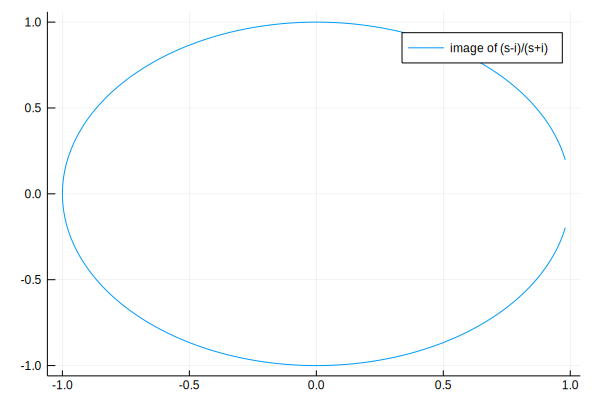

In [3]:
g = s -> (s-im)/(s+im)

ss = linspace(-10.,10.,1000)
plot(real.(g.(ss)), imag.(g.(ss)); label="image of (s-i)/(s+i)")

Therefore, $\log g(s)$ has a branch cut if we use the standard branch, which breaks the continuity requirement:

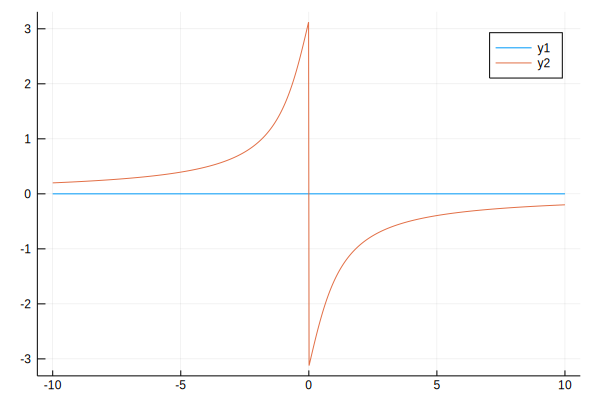

In [4]:
plot(ss, real.(log.(g.(ss))))
plot!(ss, imag.(log.(g.(ss))))

We could have analytically continued $\log g(z)$ using
$$
\log_1 z = \begin{cases} \log z & \Im z > 0 \\
                            \log_+ z & z < 0 \\
                            \log z + 2\pi \I & \Im z < 0 
                            \end{cases}
                            $$
But then $\lim_{s\rightarrow + \infty} \log_1 g(s) = 2 \pi \I$:

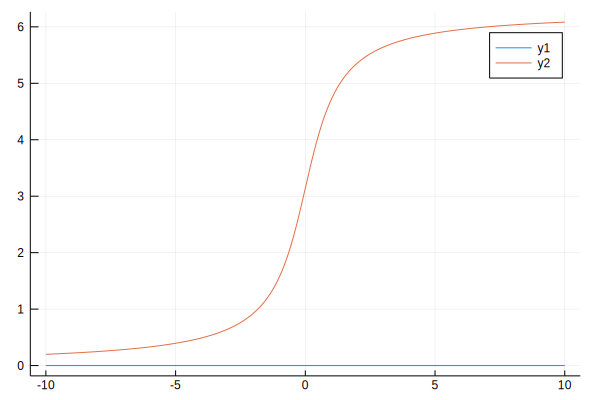

In [5]:
log₁ = z -> imag(z) > 0 ? log(z) : log(z)+2π*im
plot(ss, real.(log₁.(g.(ss))))
plot!(ss, imag.(log₁.(g.(ss))))




**Example** Consider 
$$
g(s) = {s^2+3 \over s^2+1} = 1 + O(s^{-1})
$$
Before we do anything **Verify that the winding number is zero**.


We provide two methods for calculating $\kappa$: one guesses the solution, the other uses the solution formula.


*Method 1 (Guess and check / kernel factorization)* If we can guess the solution, we can check it satisfies the right criteria.   Factoring $g$ we see immediately that
$$
g(s) = {s-\I \over s-\sqrt{3} \I} {s+\I \over s+\sqrt{3} \I}
$$
Note that the first term is analytic in  the upper half plane. The second term is analytic in the lower half plane _and_ invertible. Therefore we can guess the solution is 
$$
\kappa(z)  = \begin{cases}
        {z+\sqrt 3\I \over z+\I} & \Im z > 0 \\
            {z-\I \over z-\sqrt 3\I} & \Im z < 0
           \end{cases}
           $$
This satisfies the three conditions:
1. $\kappa$ is analytic off $\R$
2. $\lim_{z\rightarrow \infty}\kappa(z) = 1$ 
3. It has the right jump
$$
g(s) \kappa_-(s) =  {s^2+3 \over s^2+1} {s-\I \over s-\sqrt 3\I}  = {s+\I \over s+\sqrt 3 \I} = \kappa_+(s)
$$
This function is indeed analytic off the real line.

Let's check that it has the right jump:

In [6]:
g = s -> (s^2+3)/(s^2+1)

κ(0.1+eps()im) - g(0.1)*κ(0.1-eps()im)

UndefVarError: UndefVarError: κ not defined


*Method 2 (evaluate explicit form)* This is real valued and positive, hence the winding number of its image is zero.  We have 
$$
\log g(s) = \log({s+\sqrt 3\I \over s+\I}{s-\sqrt 3\I \over s-\I}) 
$$
Because they are complex conjugates, we know $\log a \bar a = \log a + \log \bar a$ as $[1, \bar a, a]$ lies in the same half plane for $a = {s+\sqrt 3 \I \over s+ \I}$, therefore we can expand:
$$
\log g(s) = \log{s+\sqrt 3\I \over s+\I} + \log {s-\sqrt 3\I \over s-\I}
$$
Now we note that $\log{s+3\I \over s+\I}$ is analytic in the upper-half plane, therefore it's Cauchy transform, by Plemelj, is
$$
\CC\br[\log{s+\sqrt 3\I \over s+\I}](z) = \begin{cases}
        \log{z+\sqrt 3\I \over z+\I} & \Im z > 0 \\
           0 & \Im z < 0
           \end{cases}
$$
Similarly,
$$
\CC\br[\log{s-\sqrt 3\I \over s-\I}](z) = \begin{cases}
        -\log{z-\sqrt 3\I \over z-\I} & \Im z > 0 \\
           0 & \Im z < 0
           \end{cases}
$$
We thus get:
$$
\kappa(z) = \E^{\CC\log g(z)} = \E^{\begin{cases}
        \log{z+\sqrt 3 \I \over z+\I} & \Im z > 0 \\
            -\log{z- \sqrt 3\I \over z-\I} & \Im z < 0
           \end{cases}} = \begin{cases}
        {z+ \sqrt 3 \I \over z+\I} & \Im z > 0 \\
            {z-\I \over z-\sqrt 3\I} & \Im z < 0
           \end{cases}
$$



### Inhomogenous Riemann–Hilbert problem

Consider now the  Riemann–Hilbert problem with zero at infinity:
$$
\Phi_+(s) - g(s)\Phi_-(s) = h(s) \qqand \Phi(\infty) =0
$$
Consider writing $\Phi(z) =  \kappa(z) \Psi(z)$. Then we can reduce the Riemann–Hilbert problem to a subtractive problem: 

$$
\Phi_+(s) - g(s)\Phi_-(s) = \kappa_+(s)(\Psi_+(s) - \Psi_-(s))\qqand \Psi(\infty) = 0
$$
Thus once we have $\kappa$ we can construct $\Phi$.

What if we don't have decay? Just add in a constant times $\kappa$:

**Corollary** Suppose $\log g$ satisfies the conditions of Plemelj's theorem. Then
$$
\Phi(z) = \kappa(z) \CC_\R\br[{h \over \kappa_+}](z) + D \kappa(z)
$$
is the unique solution to
$$
\Phi_+(s) - g(s)\Phi_-(s) = h(s) \qqand \Phi(\infty) =D
$$


*Example* Suppose $h(s) = {\I \over \I-s}$. 

To decompose this as a sum of things analytic in half planes, we just use partial fraction expansion!
\begin{align*}
{\I \over \I-s} {s + \I \over s+ \I \sqrt{3}} &= {\I \over \I-s}{2\I \over \I(1+ \sqrt{3})}  +{\I \over \I(1+\sqrt 3)} {\I(1-\sqrt 3) \over s+ \I \sqrt{3}}\\
&= \underbrace{{-2 \I \over s-\I}{1 \over 1+ \sqrt{3}}}_{-Y_-(s)}  + \underbrace{{\I \over 1+\sqrt 3} {1-\sqrt 3 \over s+ \I \sqrt{3}}}_{Y_+(s)}
\end{align*}
Thus we get
$$
Y(z) = \begin{cases} 
{\I \over 1+\sqrt 3} {1-\sqrt 3 \over z+ \I \sqrt{3}} & \Im z > 0 \\
{2 \I \over z-\I}{1 \over 1+ \sqrt{3}} & \Im z < 0
\end{cases}
$$
Let's double check:



In [7]:
h = s -> im/(im-s)

Y = z -> imag(z) > 0 ? im*(1-sqrt(3))/(1+sqrt(3))/(z+im*sqrt(3)) :
                       2im/((z-im)*(1+sqrt(3)))

Y(0.1+eps()im) - Y(0.1-eps()im)

0.5706161966689216 - 0.08138224450306746im

In [8]:
h(0.1)/κ(0.1+eps()im)

UndefVarError: UndefVarError: κ not defined

We thus have the solution:
\begin{align*}
\Phi(z)  &= \kappa(z) \CC_\R\br[{h \over \kappa_+}](z) = \begin{cases} 
{\I \over 1+\sqrt 3} {1-\sqrt 3 \over z+ \I \sqrt{3}} {z+\sqrt{3}\I \over z+\I} & \Im z > 0 \\
{2 \I \over z-\I}{1 \over 1+ \sqrt{3}} {z-\I \over z-\sqrt{3}\I} & \Im z < 0
\end{cases} \\
    &= \begin{cases} 
{\I \over 1+\sqrt 3} {1-\sqrt 3 \over z+\I} & \Im z > 0 \\
{2 \I  \over 1+ \sqrt{3}} {1 \over z-\sqrt{3}\I} & \Im z < 0
\end{cases}
\end{align*}

Let's verify it's the right thing:

1. It's analytic off $\R$

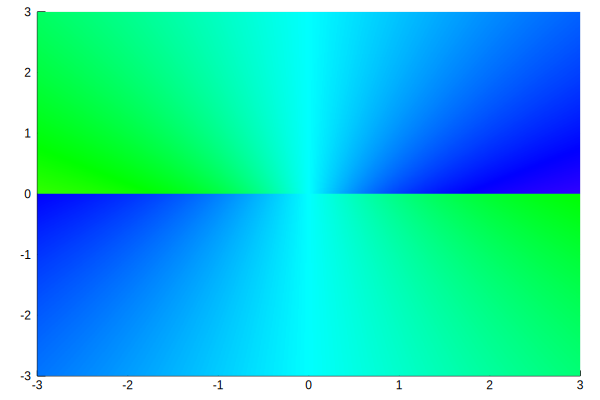

In [9]:
φ =  z -> imag(z) > 0 ? im*(1-sqrt(3))/(1+sqrt(3))/(z+im) :
                       2im/((z-sqrt(3)*im)*(1+sqrt(3)))

phaseplot(-3..3, -3..3, φ)

2\. It goes to zero at infinity

In [10]:
φ(300.0+300.0im)

-0.0004465795146304169 - 0.0004450958617578906im



3\. It satisfies the right jump:
\begin{align*}
 \Phi_+(s) - g(s) \Phi_-(s) = {\I \over 1+\sqrt 3} {1-\sqrt 3 \over s+\I}  - {s^2 + 3 \over s^2 + 1} 
{2 \I  \over 1+ \sqrt{3}} {1 \over s-\sqrt{3}\I}  \\
 = {\I (s-\I) \over 1+\sqrt 3} {1-\sqrt 3 \over s^2+1}  - {s + \sqrt{3} \I \over s^2 + 1} 
{2 \I  \over 1+ \sqrt{3}}  \\
= {1\over s^2 + 1} 
{1 \over 1+ \sqrt{3}}  \left(\I(1-\sqrt 3) s+1-\sqrt{3}  - 2\I s + 2 \sqrt{3}    \right) \\
= {1\over s^2 + 1} 
 \left(-\I s+1    \right) = {\I \over \I - s}
\end{align*}

In [11]:
φ(0.1+eps()im) - φ(0.1-eps()im)*g(0.1) - h(0.1)

-1.1102230246251565e-16 + 2.7755575615628914e-17im